# INTRODUCTION


This case study is the capstone project of **Google Data Analytics Professional Certificate**. *How Can a Wellness Technology Company Play It Smart?*

Bellabeat is a high-tech manufacturer of health-focused smart product, provides users with health data related to their activity, sleep, stress, menstrual cycle, mindfullness habits so as to help users better understand their current habits and make healthy decisions. In order to answer the key business questions *How Can a Wellness Technology Company Play It Smart?*, I will follow the steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act**. 

## 1. Ask: 
    Identify the problem to be solved and how our insights can drive business decisions.
### 1.1 Business task: 
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.
### 1.2 Stakeholders:
- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy.
### 1.3 Business Objectives:
- What are some trends in smart devices usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat maketting strategy?
### 1.4 Diliverables:
1. A clear summary of the business tasks.
2. A description of all data sources used.
3. Documentation of any cleaning or manipulation of data.
4. A summary of analysis.
5. Supporting visualization and key findings.
6. Your top high-level content recommendations base on analysis.

## 2. Prepare:
    Gather the relevant data, organize it and store it. Verify data integrity and credibility.
### 2.1 Data Source:
- The dataset is stored in 18 csv files in *long* format and available to download on Kaggle: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)
- This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.
- Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

### 2.2 Explore data credibility: ROCCC process
1. **R**eliable: It only has 30 respondents but the respondents is eligible, no bias &rarr; **MEDIUM**
2. **O**riginal: Sencond-party data (Amazon Mechanical Turk) &rarr; **MEDIUM**
3. **C**omprehensive: It includes minute-level output for physical activity, heart rate, and sleep monitoring suitable for Bellabeat  &rarr; **HIGHT**
4. **C**urrent: Data was collected 5 years ago but it was relevant to the task &rarr; **MEDIUM**
5. **C**ited: Data has no citing &rarr; **LOW**

### 2.3 Ensure Data Integrity 
- The data have completed since 2016.


## 3. Process
    Choose tools to handle the data and identify its advantages. Clean our data and ensure it is ready for analysis. Document the cleaning process and save cleaned data.
### 3.1 Choosing Tools:
I use Python and it's library to process and analyze the data.

### 3.2 Importing Packages and Dataset:
The **numPy, pandas, matplotlib, datetime** packages are installed and aliased for easy reading.

In [2]:
# import packages and alias
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import datetime as dt

# import data by read_csv function
daily_activity = pd.read_csv("dailyActivity_merged.csv")

### 3.3 Data cleaning and manipulation
Showing 5 first rows of dataset by using head function

In [3]:
# head function was used to preview 5 first rows of all collumns.
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Then, we will check for null/missing values and duplicated.

In [4]:
daily_activity.shape

(940, 15)

In [5]:
# find duplicated value in data set
daily_activity[daily_activity.duplicated()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [6]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
unique_id

33

**From the above observation, noted that**
- Data frame has 940 rows and 15 collumns, this is a long data set.
- Data has no duplicated.
- The data has no null/missing value
- Name of all collumns and their type.
- The data has 33 unique IDs instead of 30 IDs from 30 Fitbit users.The data has 33 unique IDs intead of 30 IDs from 30 Fitbit users.
- Type of ActivityDate collumns is *object* and should be changed to *datetime64* so as to easier to analyze.


**The following data manipulation is performed:**
- Convert ActivityDate to *datetime64* type with format *yyyy-mm-dd*.
- Create new colloumn *DayOfWeek* by separating the date into day of the week for further analysis.

In [8]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

#check for "ActivityDate" type and format
daily_activity.info()
daily_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [9]:
# Create new collumn "DayOfWeek"
new_cols = ['Id', 'ActivityDate', 'DayOfWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance',
            'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMinutes', 'Calories']

df_activity = daily_activity.reindex(columns= new_cols)
df_activity.head()

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,1863


In [10]:
df_activity['DayOfWeek'] = df_activity['ActivityDate'].dt.day_name()
df_activity['TotalMinutes'] = df_activity['VeryActiveMinutes'] + df_activity['FairlyActiveMinutes'] + df_activity['LightlyActiveMinutes'] + df_activity['SedentaryMinutes']
df_activity.head()

,Id,ActivityDate,DayOfWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,1863


Data cleaning and manipulation is completed. The dataset is ready to be analyzed.

## 4. Analyze
    Organize and format the data to answer our questions. Perform calculations and identify trends and relationships within the data.

### 4.1 Statistic calculations:

In [11]:
# pull general statistics
df_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,4900.000000


**Interpreting statistical findings:**
- On average, users logged 7,638 steps or 5.47km, spent 1218.75 minutes and burned 2303.61 calories.
- Specifically, very active is 1.5km (27.42%) and 21.16 minutes (1.74%); moderately active is 0.57km (10.42%) and 13.56 minutes (1.11%); light active is 3.34km (61.06%) and 192.81 minutes (15.82%); and sedentary active is 0.002km (0.04%) but spend 991.21 minutes (81.33%).
- 

### 4.2 Consider data correlation

In [12]:
df_activity.corrwith(df_activity['Calories'])

Id                          0.396671
TotalSteps                  0.591568
TotalDistance               0.644962
TrackerDistance             0.645313
LoggedActivitiesDistance    0.207595
VeryActiveDistance          0.491959
ModeratelyActiveDistance    0.216790
LightActiveDistance         0.466917
SedentaryActiveDistance     0.043652
VeryActiveMinutes           0.615838
FairlyActiveMinutes         0.297623
LightlyActiveMinutes        0.286718
SedentaryMinutes           -0.106973
TotalMinutes                0.094951
Calories                    1.000000
dtype: float64

**Consider correlation between *Calories* and Other:**
- Correlation between Calories and TotalSteps is 0.59
- Correlation between Calories and TotalDistance is 0.64
- Correlation between Calories and TotalMinutes is 0.09

## 5. Share
    Create visualizations to share most relevant findings. Relate findings to original questions.
    
### 5.1 Which day women  burn more calories?

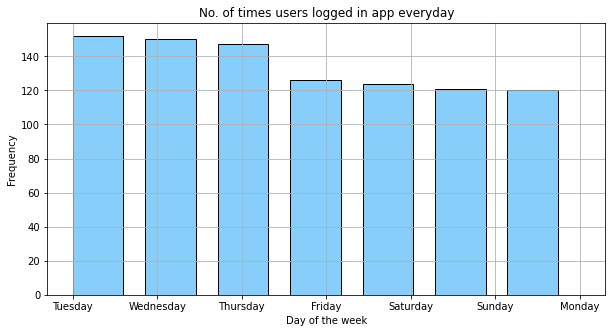

In [13]:
plt.figure(figsize= (10, 5)) # specify size of the chart
plt.hist(df_activity.DayOfWeek, bins = 7, width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app everyday")
plt.grid(True)
plt.show()

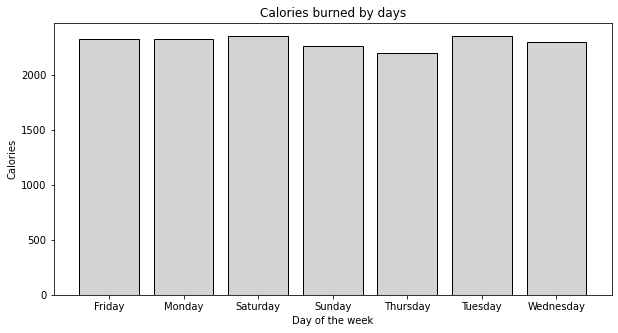

In [14]:
DayOfWeek = df_activity.groupby('DayOfWeek').DayOfWeek.unique().index
Calories = df_activity.groupby('DayOfWeek').Calories.mean()
fig = plt.figure(figsize = (10, 5))

# create the bar plot
plt.bar(DayOfWeek, Calories, color = "lightgray", edgecolor = "black")
plt.xlabel("Day of the week")
plt.ylabel("Calories")
plt.title("Calories burned by days")
plt.show()

In [15]:
Calories

DayOfWeek
Friday       2331.785714
Monday       2324.208333
Saturday     2354.967742
Sunday       2263.000000
Thursday     2199.571429
Tuesday      2356.013158
Wednesday    2302.620000
Name: Calories, dtype: float64

**Frequency of usage across the week:** In the first histogram, we are looking at the frequency of FitBit app usage in terms of days of the week.
1. We discovered that users prefer or remember to track their activity on the app during midweek from Tuesday to Friday. 
2. Noting that the frequency dropped on Friday and continue on weekends and Monday.

**Calories burned by days:** In next bar chart, we consider which day women burn more calories
1. The number of calories burned per day is quite even while the difference in the number of app logins is quite large.
2. On Thursday women's burning calory is lowest (2199.57) where Tuesday has highest calory (2356.01) burning record although they are both in the top logged day of the week.

### 5.2 How does the number of steps taken in a day affect the amount of calories burned?


Text(0.5, 1.0, 'Linear regression chart of relations Calories and Total step taken')

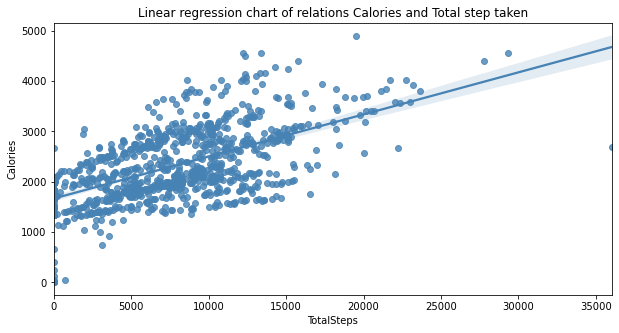

In [16]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.regplot(data = daily_activity, x= 'TotalSteps', y ='Calories', color = "steelblue")
plt.title("Linear regression chart of relations Calories and Total step taken")

As we expected the amount of calories burned in a day grows as the user takes more steps. But there is an inetersting fact that the intercept of the regression line represents the amount of burned calories in a day with ****no steps** taken. This is the amount of calories users are burning in a very sedentary day.  
We continue to consider *How users spend their activity time?*

In our *df_activity* there are four measures of how users spend their time:
- VeryActiveMinutes that lead to VeryActiveDistance
- FairlyActiveMinutes that lead to ModeratelyActiveDistance
- VeryLightlyActiveMinutes that lead to LightActiveDistance
- SedentaryMinutes that lead to SedentaryActiveDistance

Firstly, We will plot a pie chart to observe how each activity contribute in total minutes users used app. Then, we will plot each pair in a scatter plot (Distance vs. Minutes) with a regression line to get estimate of the speed of users during these activities. To ease the comparison, we'll plot all four graphs with shared y-scale.

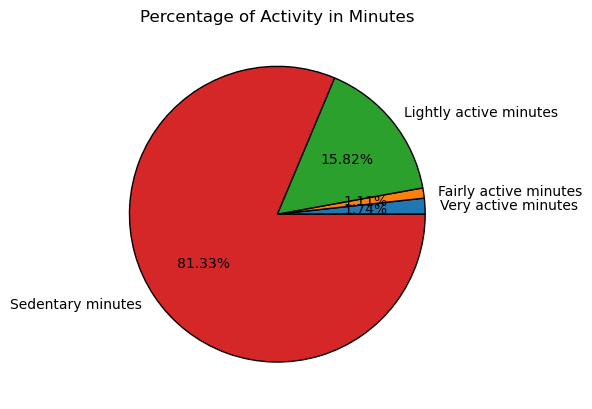

In [23]:
VeryActiveMinutes = df_activity["VeryActiveMinutes"].sum()
FairlyActiveMinutes = df_activity["FairlyActiveMinutes"].sum()
LightlyActiveMinutes = df_activity["LightlyActiveMinutes"].sum()
SedentaryMinutes = df_activity["SedentaryMinutes"].sum()

# plotting pie chart
slices = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
plt.style.use("default")
plt.pie(slices, labels = labels, wedgeprops = {"edgecolor": "black"}, autopct = "%1.2f%%")
plt.title("Percentage of Activity in Minutes")
plt.show()

<AxesSubplot:xlabel='SedentaryMinutes', ylabel='SedentaryActiveDistance'>

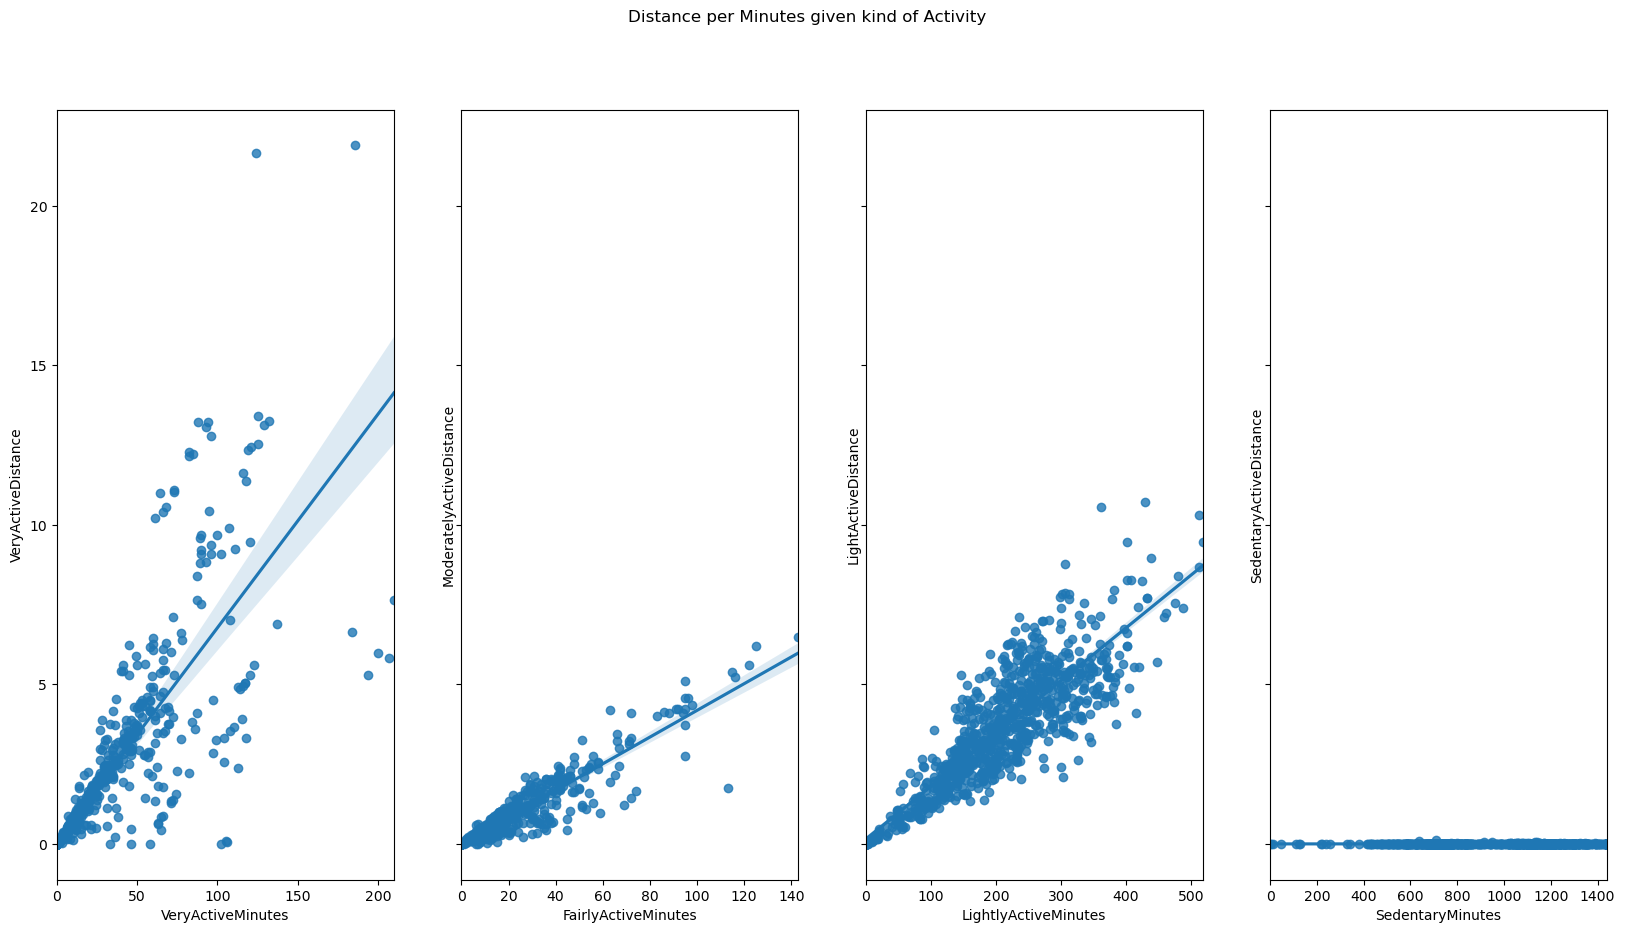

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)
fig.suptitle('Distance per Minutes given kind of Activity')

sns.regplot(data = df_activity, x = 'VeryActiveMinutes', y = 'VeryActiveDistance', ax=axes[0])

sns.regplot(data = df_activity, x = 'FairlyActiveMinutes', y = 'ModeratelyActiveDistance', ax=axes[1])

sns.regplot(data = df_activity, x = 'LightlyActiveMinutes', y = 'LightActiveDistance', ax=axes[2])

sns.regplot(data = df_activity, x = 'SedentaryMinutes', y = 'SedentaryActiveDistance', ax=axes[3])


As we can see,
1. In the pie chart, sedentary minutes takes the biggest slice at 81.33%, the second biggest is lightly active with 15.82%, the next is very active with 1.74% and the last is fairly active with 1.11%.
2. The very active distances are traveled in shorter times (that is, they have larger speeds represented by steeper regression line), and the regression line of sedentary active hardly steeped.
3. A unexpected result here is that lightly active minutes lead to greater speeds than fairly active minutes. It can be explained that the number of samples of fairly active minutes is not scattered enough for the regression line to be accurate (most of them was in range 0-60).



## 6. Act
    Present final conclusions and suggested approach to deal with findings and next steps.

**So, We have finished creating my visualizations, act on our findings. Now, we can answer the business questions in the first step and share with you our high-level business recommendations.**
### 1. What are some trends in smart device usage?
- Majority of users (81.33%) are using smart device usage to track sedentary activities in stead of using it for tracking their health habits.
- Users trend to log in app more on weekdays and less on weekends.
- There is no clear distinction in user activity across different days of the week (amount of calories was burned in different days don't fluctuate much).  

### 2. How could these trends help influence Bellabeat marketing strategy?
- Prompting notification to encourage users to exercise on weekend.
- We can show the number of steps in real time and motivate users to reach a certain number of steps daily.
- Predicting amount of calories would be burned if users reached a number of steps to help customer easy to track their burned calories.